In [2]:
import matplotlib
import loadnotebook
from helper import * 

importing Jupyter notebook from helper.ipynb


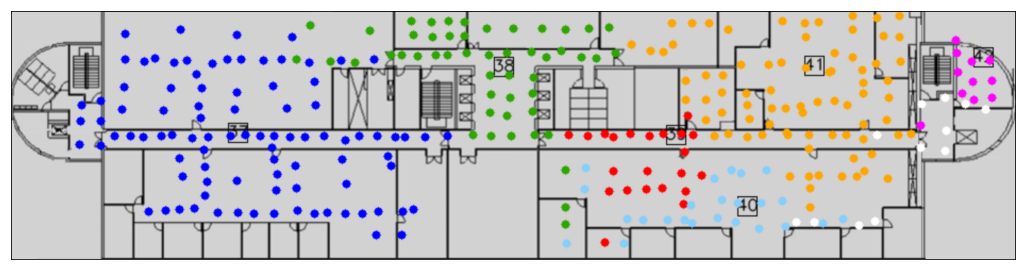

In [5]:
#Check the priority and set first
#And modify whitelist in helper
#lock_pci and pci_locker are for single pci map
'''
import sys
set_value = sys.argv[1]
pci_locker = int(sys.argv[2])
if pci_locker == 0:
    lock_pci = False
else:
    lock_pci = True
    '''
priority = 6
set_value = 1

#Set lock_pci = True, if you want to show the map for one specific pci
#And the pci_locker is which pci you want 

lock_pci = False
pci_locker = 13

#to check is there a missing point we need to regather

source = get_source(priority, set_value)

#make sure there is the correct path for file to put in

output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value) + ".csv"
    
def get_output_image(prefix="") :
    if lock_pci and pci_locker in whitelist_PCI:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) +"/"+str(pci_locker)+ "_" + prefix + ".png"
    else:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) + "_" + prefix + ".png"

result = pd.read_csv(output_csv) #read csv as df
#LOCK THE PCI

if lock_pci and pci_locker in whitelist_PCI:
    filter = result["PCI"] == pci_locker
    result=result[filter]

#if not lock_pci :

#PCI MAP

df = result.dropna(subset=["PCI"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
pci_list = df["PCI"].astype('int32')

pci_summary = summary_based_on_location_for_pci(lat_list, lon_list, pci_list)
#structure: {lat: {lon: {pci: weight}
x_list, y_list, pci1_list, pci2_list, pci3_list,\
pci4_list, pci5_list, pci6_list, outer_pci_list,\
mode_pci_list, pci_sum, interference_list  = summary_dict_to_list_multi_pci(pci_summary)

multi_pci_summary = {"x_location" : x_list,
                     "y_location" : y_list,
                     "pci_37" : pci1_list,
                     "pci_38" : pci2_list,
                     "pci_39" : pci3_list,
                     "pci_40" : pci4_list,
                     "pci_41" : pci5_list,
                     "pci_42" : pci6_list,
                     "outer_pci" : outer_pci_list,
                     "mode_pci" : mode_pci_list,
                     "total_pci_num" :pci_sum,
                     "interference_level" : interference_list}
df_pci = pd.DataFrame(multi_pci_summary)

new_format=True
new_backtorgb = get_map_image(new_format=new_format)

new_backtorgb = visualize_pci(new_backtorgb, x_list, y_list, pci1_list, pci2_list, pci3_list, pci4_list,
                              pci5_list,pci6_list, outer_pci_list, get_output_image("pci"), adjustment=new_format,bs=True)
